<a href="https://colab.research.google.com/github/juhwikim/python_projects/blob/main/MSDS422_Week1_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Data Exploration**

1a. Load Data Sets & Packages

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
houseprices_train = pd.read_csv('/content/drive/MyDrive/422 Machine Learning Group /Week 1/house-prices-advanced-regression-techniques/train.csv')

In [ ]:
houseprices_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


1b. Dataframe Overview

In [ ]:
#Rows and Columns
houseprices_train.shape

(1460, 81)

In [ ]:
houseprices_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
houseprices_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
houseprices_train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [ ]:
#Descriptive statistics and visualiztions to help understand the marginal distribution of the dependent variable SalePrice
houseprices_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


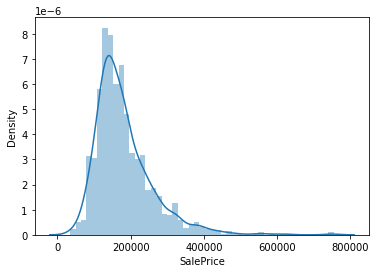

In [ ]:
#histogram
sns.distplot(houseprices_train['SalePrice']);

In [ ]:
#skewness
print("Skewness: %f" % houseprices_train['SalePrice'].skew())

Skewness: 1.882876


In [ ]:
#Checking for proportions of Null Values in Columns
houseprices_train.isnull().mean().sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

Observation: SalePrice is not normally distributed. 

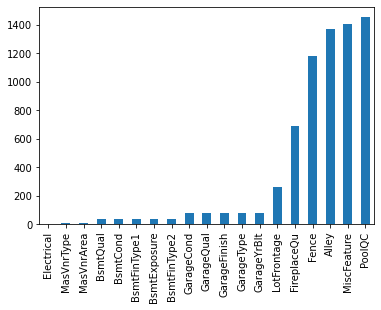

In [ ]:
#Graph of fields with missing values - sorted by number of missing values
missing = houseprices_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [ ]:
#Total number of Null values
houseprices_train.isnull().sum().sum()

6965

In [ ]:
#Proportion of null values compred to entire data set
6965 / (1460*81)

0.05889565364451209

Null values take up 5.89% of total data

In "PoolQC" column, NaN indicates houses with no pool. We could change Null values to "None" But, since almost 99% of houses do not have pools, this variable may not be a good indicator for house prices.


In [ ]:
houseprices_train["PoolQC"].value_counts(dropna=False)

NaN    1453
Gd        3
Fa        2
Ex        2
Name: PoolQC, dtype: int64

Similarly, while inclusion of Shed or Tennis Court may not be a good indicator for housing price alone, we could transform this variable into property that offers additional amentity vs. standard ("None"). 

In [ ]:
houseprices_train["MiscFeature"].value_counts(dropna=False)

NaN     1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

For FireplaceQu, we can transform this into numerical rating and turn Null value into zero. 

In [ ]:
houseprices_train["FireplaceQu"].value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [ ]:
houseprices_train.MiscFeature.isnull().sum()

1406

In [ ]:
houseprices_train["FireplaceQu"].isnull().sum()

690

## **2. Data Preparation**

**We could copy train dataframe here so that any changes we make below will be only reserved in new DF**



In [ ]:
houseprices_train_copy = houseprices_train.copy()

Creating a Correlation Heat Map to see what values actually impact the selling price of a house

In [ ]:
correlations = houseprices_train.corr()
print(correlations['SalePrice'].sort_values(ascending=False))


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

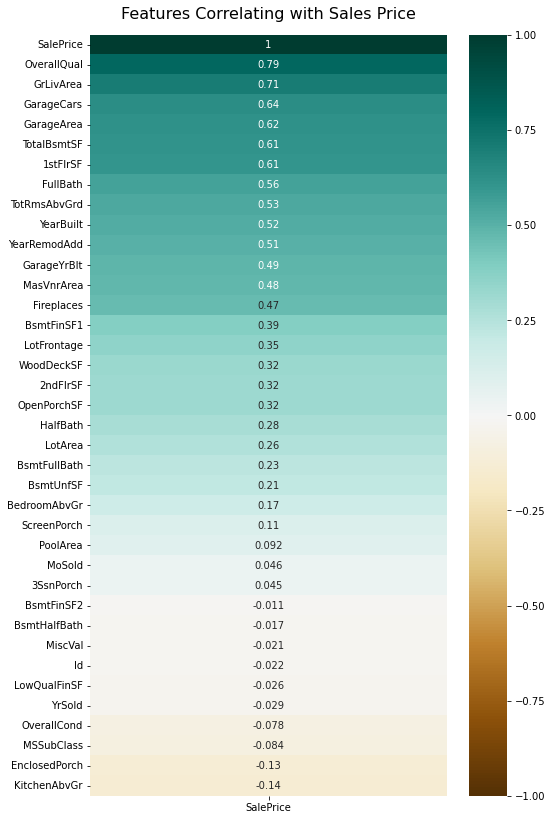

In [ ]:
plt.figure(figsize=(8, 14))
heatmap = sns.heatmap(houseprices_train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':16}, pad=16);

2a. Transforming Categorical Variables into Numerical Variables

In [ ]:
#Has Paved Street vs. Gravel access to property. 1 = Yes Paved 0 = Gravel
houseprices_train['Has_PavedStreet'] = houseprices_train['Street'].map(lambda street: 1 if street == 'Pave' else 0)
houseprices_train['Has_PavedStreet'].value_counts()

1    1454
0       6
Name: Has_PavedStreet, dtype: int64

In [ ]:
#Has either Gravel or Paved Alley way access to property 1 = Yes Alley Access 0 = None
houseprices_train['Alley'] = houseprices_train['Alley'].fillna(value="None")
houseprices_train['Has_Alley'] = houseprices_train['Alley'].map(lambda alley: 0 if alley == 'None' else 1)
houseprices_train['Has_Alley'].value_counts()

0    1369
1      91
Name: Has_Alley, dtype: int64

In [ ]:
#Ranking slope of property 1 = gentle slope 2 = moderate slope or 3 = severe slope
houseprices_train['Slope_Severity'] = houseprices_train['LandSlope'].map({'Gtl': 1, 'Mod':2 , 'Sev':3})
houseprices_train['Slope_Severity'].value_counts()

1    1382
2      65
3      13
Name: Slope_Severity, dtype: int64

In [ ]:
#If the property has Central AC 1 else 0
houseprices_train['Has_Central_AC'] = houseprices_train['CentralAir'].map({'Y': 1, 'N': 0})
houseprices_train['Has_Central_AC'].value_counts()

1    1365
0      95
Name: Has_Central_AC, dtype: int64

'Fence': there's only a handful of 'Fence' types, so creating a 'Has_Fence' feature to simplify and change to numerical

In [ ]:
#creating 'Has_Fence'
houseprices_train['Fence'] = houseprices_train['Fence'].fillna(value="None")
houseprices_train['Has_Fence'] = houseprices_train['Fence'].map(lambda fence: 0 if fence == 'None' else 1)
houseprices_train['Has_Fence'].value_counts()

0    1179
1     281
Name: Has_Fence, dtype: int64

'FireplaceQu': creating ranks based on the quality of the fireplace

NOTE: condition grades may not be correct but can be easily switched

In [ ]:
#Ranks for FireplaceQu: Nan=0, Po=1, Fa=2, TA=3, Gd=4, Ex=5
houseprices_train['FireplaceQualRank'] = houseprices_train['FireplaceQu'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
houseprices_train['FireplaceQualRank'] = houseprices_train['FireplaceQualRank'].fillna(0)
houseprices_train['FireplaceQualRank'].value_counts()

0.0    690
4.0    380
3.0    313
2.0     33
5.0     24
1.0     20
Name: FireplaceQualRank, dtype: int64

'GarageQual' and 'GarageCond'have same scale as FireplaceQu'. 'GarageQual' and 'GarageCond' show slight discrepancy. 

In [ ]:
houseprices_train['GarageQualRank'] = houseprices_train['GarageQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
houseprices_train['GarageQualRank'] = houseprices_train['GarageQualRank'].fillna(0)
houseprices_train['GarageQualRank'].value_counts()

3.0    1311
0.0      81
2.0      48
4.0      14
1.0       3
5.0       3
Name: GarageQualRank, dtype: int64

In [ ]:
houseprices_train['GarageCondRank'] = houseprices_train['GarageCond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
houseprices_train['GarageCondRank'] = houseprices_train['GarageCondRank'].fillna(0)
houseprices_train['GarageCondRank'].value_counts()

3.0    1326
0.0      81
2.0      35
4.0       9
1.0       7
5.0       2
Name: GarageCondRank, dtype: int64

## 2b. Impute Null Values

In [ ]:
#Creating temporary dataframe to impute null values to "NaN"
houseprices_missingdata = houseprices_train[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']].copy()
houseprices_missingdata.head()

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage
0,NaN,NaN,NaN,NaN,NaN,65.0
1,NaN,NaN,NaN,NaN,TA,80.0
2,NaN,NaN,NaN,NaN,TA,68.0
3,NaN,NaN,NaN,NaN,Gd,60.0
4,NaN,NaN,NaN,NaN,TA,84.0


In [ ]:
houseprices_missingdata['PoolQC'] = houseprices_missingdata['PoolQC'].fillna(value='NaN')
houseprices_missingdata.isnull().sum()

PoolQC            0
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
LotFrontage     259
dtype: int64

In [ ]:
houseprices_missingdata['MiscFeature'] = houseprices_missingdata['MiscFeature'].fillna(value='NaN')

In [ ]:
houseprices_missingdata['Alley'] = houseprices_missingdata['Alley'].fillna(value='NaN')

In [ ]:
houseprices_missingdata['Fence'] = houseprices_missingdata['Fence'].fillna(value='NaN')

In [ ]:
houseprices_missingdata['FireplaceQu'] = houseprices_missingdata['FireplaceQu'].fillna(value='NaN')

2c. Create Additional Variables

In [ ]:
#Adding all Indoor SQFT variables 
houseprices_train['Overall_Indoor_SF'] = houseprices_train['TotalBsmtSF'] + houseprices_train['GrLivArea'] 
houseprices_train['Overall_Indoor_SF'].head(10)

0    2566
1    2524
2    2706
3    2473
4    3343
5    2158
6    3380
7    3197
8    2726
9    2068
Name: Overall_Indoor_SF, dtype: int64

In [ ]:
#Adding overall number of Bathrooms
houseprices_train['Overall_Bath'] = houseprices_train['BsmtFullBath'] + houseprices_train['FullBath'] +(houseprices_train['BsmtHalfBath']/2) + (houseprices_train['HalfBath']/2)
houseprices_train['Overall_Bath'].head(10)

0    3.5
1    2.5
2    3.5
3    2.0
4    3.5
5    2.5
6    3.0
7    3.5
8    2.0
9    2.0
Name: Overall_Bath, dtype: float64

In [ ]:
#Indication of new remodel If the remodel is done within 3 years (2008-2010), 1 all else 0.
houseprices_train['Newly_Remodeled'] = houseprices_train['YearRemodAdd'].map(lambda reno: 1 if reno >= 2008 else 0)
houseprices_train['Newly_Remodeled'].value_counts()

0    1391
1      69
Name: Newly_Remodeled, dtype: int64

2d. Treat Outliers

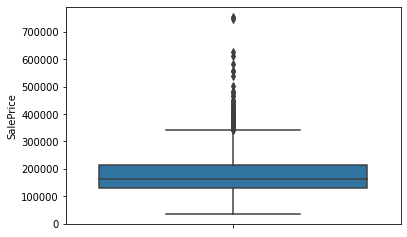

In [ ]:
#Boxplot of SalePrice
sns.boxplot(y = houseprices_train['SalePrice'])

In [ ]:
print("Highest allowed",houseprices_train['SalePrice'].mean() + 3*houseprices_train['SalePrice'].std())
print("Lowest allowed",houseprices_train['SalePrice'].mean() - 3*houseprices_train['SalePrice'].std())

Highest allowed 419248.70453907084
Lowest allowed -57406.31275824897


In [ ]:
#Create new data frame. Dropping SalePrice outliers
houseprices_train_clean = houseprices_train[(houseprices_train['SalePrice'] < 419248.70) | (houseprices_train['SalePrice'] > -57406.31)]

In [ ]:
SalePrice_outliers = houseprices_train[(houseprices_train['SalePrice'] > 419248.70) | (houseprices_train['SalePrice'] < -57406.31)]
SalePrice_outliers.shape

(22, 92)

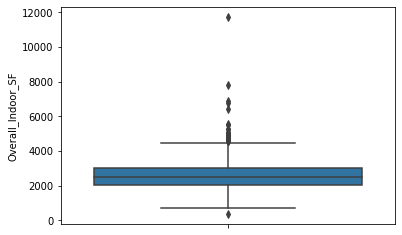

In [ ]:
#Outlier analysis on Overall_Indoor_SF
sns.boxplot(y = houseprices_train['Overall_Indoor_SF'])

In [ ]:
print("Highest allowed",houseprices_train['Overall_Indoor_SF'].mean() + 3*houseprices_train['Overall_Indoor_SF'].std())
print("Lowest allowed",houseprices_train['Overall_Indoor_SF'].mean() - 3*houseprices_train['Overall_Indoor_SF'].std())

Highest allowed 5043.6886276979385
Lowest allowed 102.09767367192535


In [ ]:
#Dropping Overall_Indoor_SF outliers
houseprices_train_clean = houseprices_train_clean[(houseprices_train_clean['Overall_Indoor_SF'] < 5043.68) | (houseprices_train_clean['Overall_Indoor_SF'] > 102.09)]


In [ ]:
Overall_Indoor_SF_outliers = houseprices_train[(houseprices_train['Overall_Indoor_SF'] > 5043.68) | (houseprices_train['Overall_Indoor_SF'] < 102.09)]
Overall_Indoor_SF_outliers.shape

(11, 92)

In [ ]:
houseprices_train_clean.shape

(1460, 92)

## **3. Data Visualization**

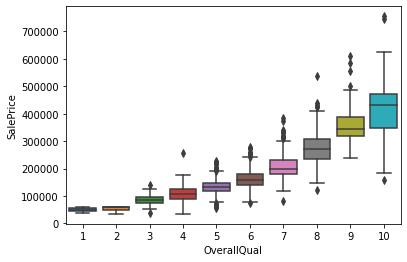

In [ ]:
#Boxplot of OverallQual vs. SalePrice
sns.boxplot(x = houseprices_train['OverallQual'], y = houseprices_train['SalePrice'])

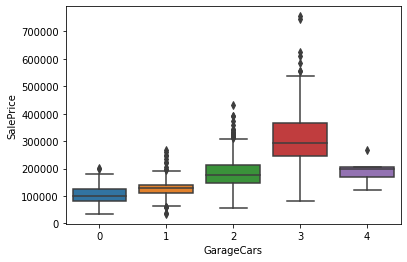

In [ ]:
#Boxplot of GarageCars vs. SalePrice
sns.boxplot(x = houseprices_train['GarageCars'], y = houseprices_train['SalePrice'])

## **4. Data scaling and comparisons**

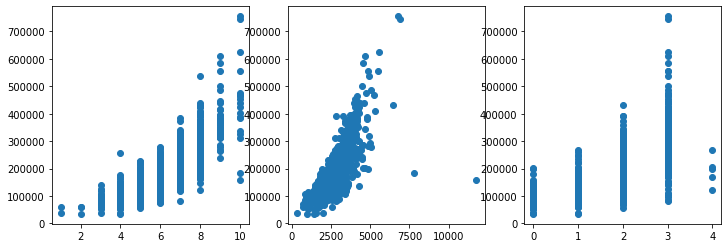

In [ ]:
x = houseprices_train[['OverallQual', 'Overall_Indoor_SF', 'GarageCars']].values
y = houseprices_train['SalePrice'].values

fig, ax = plt.subplots(ncols=3, figsize=(12, 4))

ax[0].scatter(x[:,0], y)
ax[1].scatter(x[:,1], y)
ax[2].scatter(x[:,2], y)

plt.show()

## **5. Insights from Analysis**